## KNN
k-NN演算法可以說是最簡單的機器學習演算法。

## k-Neighbors classification
在最簡單的版本中，k-NN 演算法只考慮一個最近鄰，也就是距離我們想要預測的點最近的訓練資料點。使用forge資料集

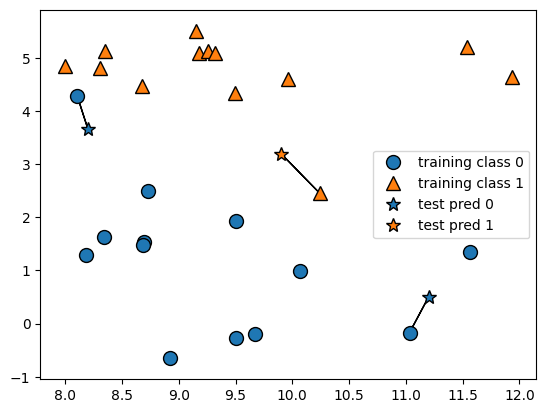

In [1]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

我們不僅可以考慮最近的鄰居，還可以考慮任意數量（k）的鄰居。這就是 k-最近鄰演算法的名稱由來。

這意味著對於每個測試點，我們計算有多少鄰居屬於類別 0，有多少鄰居屬於類別 1。

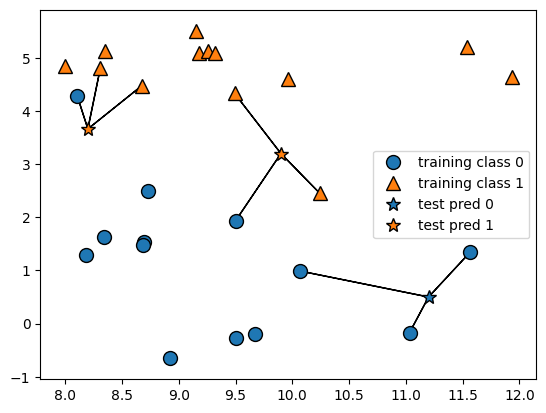

In [2]:
#分配3個
mglearn.plots.plot_knn_classification(n_neighbors=3)

雖然此範例針對的是二元分類問題，但此方法可應用於具有任意數量類別的資料集。

In [5]:
#載入資料
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
display(X)
display(y)

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [6]:
#分割為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

display(X_train)
display(X_test)

display(y_train)
display(y_test)

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

array([1, 0, 1, 0, 1, 1, 0])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #k=3
#訓練training data set
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#測試 test dataset
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [9]:
#評估
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


## 分析KNN(KNeighborsClassifier)
- 分析1個,3個,9個 neighbors
- 正如您在圖左側看到的，使用單一鄰居會產生緊密遵循訓練資料的決策邊界。
- 考慮越來越多的鄰居會產生更平滑的決策邊界。
- 更平滑的邊界對應更簡單的模型。
- 換句話說，使用少量鄰居對應模型複雜度較高，使用大量鄰居對應模型複雜度較低。

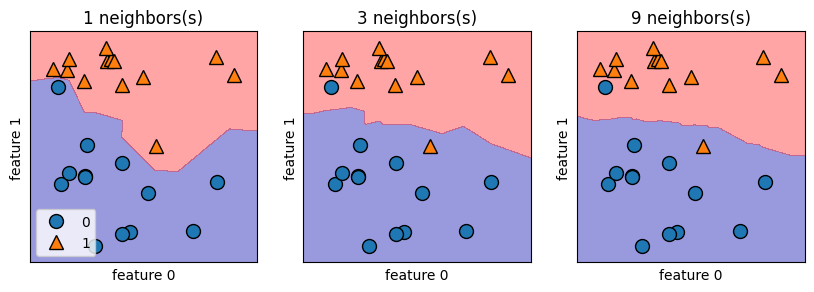

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

說明 stratify的用途
- 讓訓練集和測試集內,target的比例相同

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# Simulate data with 70 samples of class A and 30 samples of class B
y = np.array([0] * 70 + [1] * 30)  # 0 represents class A, 1 represents class B
X = np.random.rand(100, 2) #Dummy features

# Split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Without stratification:")
print("Training set proportions:", np.bincount(y_train) / len(y_train))
print("Testing set proportions:", np.bincount(y_test) / len(y_test))


# Split with stratification
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nWith stratification:")
print("Training set proportions:", np.bincount(y_train_stratified) / len(y_train_stratified))
print("Testing set proportions:", np.bincount(y_test_stratified) / len(y_test_stratified))


Without stratification:
Training set proportions: [0.7125 0.2875]
Testing set proportions: [0.65 0.35]

With stratification:
Training set proportions: [0.7 0.3]
Testing set proportions: [0.7 0.3]


- 讓我們研究一下是否可以確認我們之前討論過的模型複雜性和泛化之間的聯繫。我們將在現實世界的乳癌資料集上進行此操作。
- 我們評估具有不同數量鄰居的訓練和測試集性能。

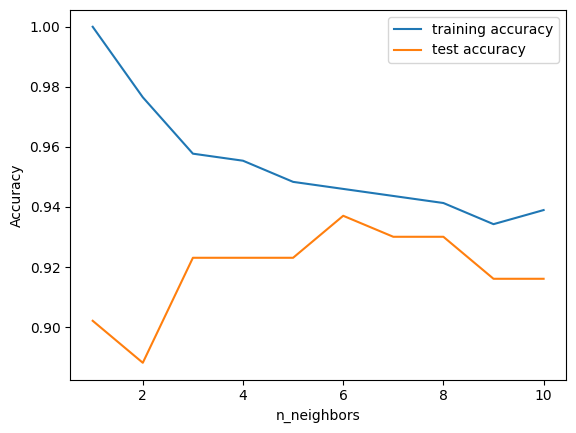

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #記錄training準確度
    training_accuracy.append(clf.score(X_train, y_train))
    #記錄泛化的準確度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()